In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [3]:
#проверим пропуски
df.isna().sum()

Unnamed: 0    0
location      0
town          0
mortality     0
hardness      0
dtype: int64

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

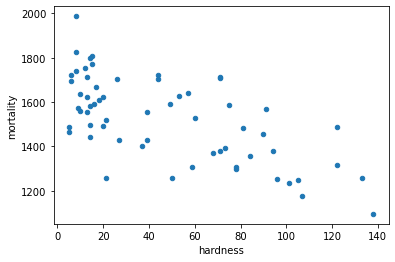

In [4]:
#Построить точечный график
# как видно по диаграмме рассеивания у нас обратная связь между смертностью и жесткостью воды - чем менее жесткая вода, тем больше смертность 
df.plot(kind='scatter', x='hardness', y='mortality')

In [5]:
#Рассчитать коэффициенты корреляции Пирсона и Спирмена
#рассчитаем линейный коэфициент корреляции Пирсона, видно, что присутсвует достаточно высокая обратная взаимосвязь
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
# рассчитаем коэфициент Спирмена, видно, что результаты почти аналогичны с коэфициентом Пирсона, вывод такой же 
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [7]:
#Построить модель линейной регрессии
#за Х возьмем жесткость воды, а за У смертность
x = df[['hardness']]
y = df['mortality']

In [8]:
#делим выборку на тренировочную и основную
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [9]:
#инициализируем линейную регрессию
model = LinearRegression()

In [10]:
#обучаем данные и подбираем оптимальный коэфициент
model.fit(x_train, y_train)

LinearRegression()

In [11]:
#Рассчитать коэффициент детерминации
#результат показывает, что связь между переменными регрессионной модели средняя(от 0 до 1)
model.score(x_test, y_test)

0.5046490611017092

In [12]:
#прогноз на тесте
y_pred = model.predict(x_test)

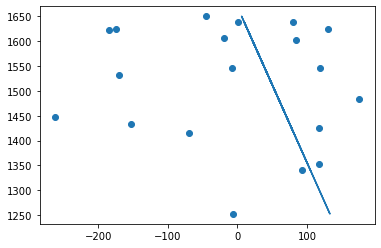

In [13]:
#Вывести график остатков
plt.scatter(y_pred-y_test, y_pred)
plt.plot(x_test, y_pred)

In [14]:
#Разобьем датасет на северные и южные города
south = df[df['location'] == 'South']
north = df[df['location'] == 'North']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

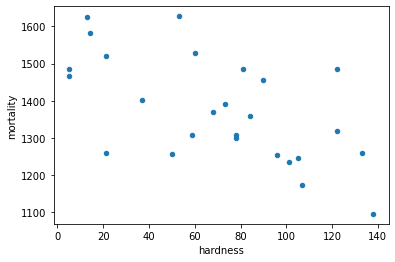

In [15]:
#Построить точечный график
south.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

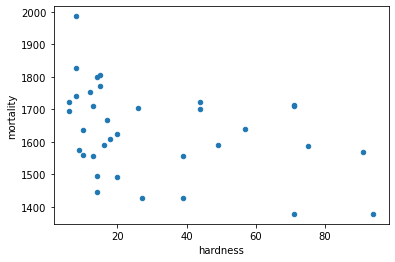

In [16]:
#Сравнивая диаграммы рассеивания для южных городов и северных, можно предположить, что для вторых чем меньше жесткость воды,
#тем больше смертей, но для южных городов прослеживается более четкая линейная обратная связь
north.plot(kind='scatter', x='hardness', y='mortality')

In [17]:
#Чтобы убедиться, рассчитаем коэфициенты корреляции Пирсона и Спирмана для южных и северных городов
# Как видно, в южных городах взаимосвязь жесткости воды и смертности прослеживается более явно
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [18]:
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [19]:
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [20]:
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [21]:
#Проведем регрессионный линейный анализ для каждого датасета
#Для Юга
x_south = south[['hardness']]
y_south = south['mortality']

In [22]:
x_south_train, x_south_test, y_south_train, y_south_test = train_test_split(x_south, y_south, test_size = 0.30, random_state=45)

In [23]:
model_south = LinearRegression()

In [24]:
model_south.fit(x_south_train, y_south_train)

LinearRegression()

In [25]:
y_pred_south = model_south.predict(x_south_test)

In [26]:
model_south.score(x_south_test, y_south_test)

0.24232027068273643

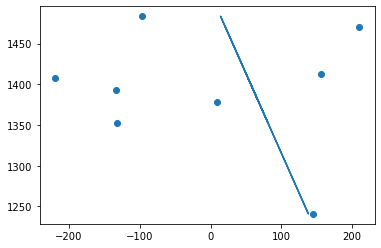

In [27]:
plt.scatter(y_pred_south-y_south_test, y_pred_south)
plt.plot(x_south_test, y_pred_south)

In [28]:
#Для Севера
x_north = north[['hardness']]
y_north = north['mortality']

In [34]:
x_north_train, x_north_test, y_north_train, y_north_test = train_test_split(x_north, y_north, test_size=0.30, random_state=46)

In [35]:
model_north = LinearRegression()

In [36]:
model_north.fit(x_north_train, y_north_train)

LinearRegression()

In [37]:
y_north_pred = model_north.predict(x_north_test)

In [38]:
model.score(x_north_test, y_north_test)

0.28926066188267285

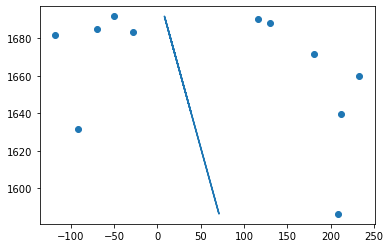

In [39]:
plt.scatter(y_north_pred-y_north_test, y_north_pred)
plt.plot(x_north_test, y_north_pred)

In [ ]:
#Коэфициенты детерминации у северных и южных городов примерно одинаковые, из этого можно сделать вывод, что в северных,
#что в южных городах можно проследить взаимосвязь невыскую между жесткостью воды и смертностью, хотя совместно этот показатель возрастает вдвое